We will start our exploratory data analysis.

In [ ]:
# Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC'
val_images_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/val/images'
val_masks_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/val/masks'
train_images_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/train/images'
train_masks_path = '/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/train/masks'

In [ ]:
val_images_list = os.listdir(val_images_path)
val_images_list.sort()
val_masks_list = os.listdir(val_masks_path)
val_masks_list.sort()

train_images_list = os.listdir(train_images_path)
train_images_list.sort()
train_masks_list = os.listdir(train_masks_path)
train_masks_list.sort()

In [ ]:
print(os.listdir(data_path))
print(val_images_list)
print(val_masks_list)
print(len(val_images_list))
print(len(val_masks_list))

['train', 'val']
['patient101_ED_slice01_frame01.jpg', 'patient101_ED_slice02_frame01.jpg', 'patient101_ED_slice03_frame01.jpg', 'patient101_ED_slice04_frame01.jpg', 'patient101_ED_slice05_frame01.jpg', 'patient101_ED_slice06_frame01.jpg', 'patient101_ED_slice07_frame01.jpg', 'patient101_ED_slice08_frame01.jpg', 'patient101_ED_slice09_frame01.jpg', 'patient101_ED_slice10_frame01.jpg', 'patient101_ES_slice01_frame14.jpg', 'patient101_ES_slice02_frame14.jpg', 'patient101_ES_slice03_frame14.jpg', 'patient101_ES_slice04_frame14.jpg', 'patient101_ES_slice05_frame14.jpg', 'patient101_ES_slice06_frame14.jpg', 'patient101_ES_slice07_frame14.jpg', 'patient101_ES_slice08_frame14.jpg', 'patient101_ES_slice09_frame14.jpg', 'patient101_ES_slice10_frame14.jpg', 'patient102_ED_slice01_frame01.jpg', 'patient102_ED_slice02_frame01.jpg', 'patient102_ED_slice03_frame01.jpg', 'patient102_ED_slice04_frame01.jpg', 'patient102_ED_slice05_frame01.jpg', 'patient102_ED_slice06_frame01.jpg', 'patient102_ED_slice

In [ ]:
print('/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/val/images/patient101_ED_slice01_frame01.jpg')
print(os.path.join(val_images_path, val_images_list[0]))

/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/val/images/patient101_ED_slice01_frame01.jpg
/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/ACDC/val/images/patient101_ED_slice01_frame01.jpg


In [ ]:
images = []
masks = []

for i in range(len(val_images_list)):
  image = Image.open(os.path.join(val_images_path, val_images_list[i]))
  image = np.array(image)
  mask = Image.open(os.path.join(val_masks_path, val_masks_list[i]))
  mask = np.array(mask)
  images.append(image)
  masks.append(mask)

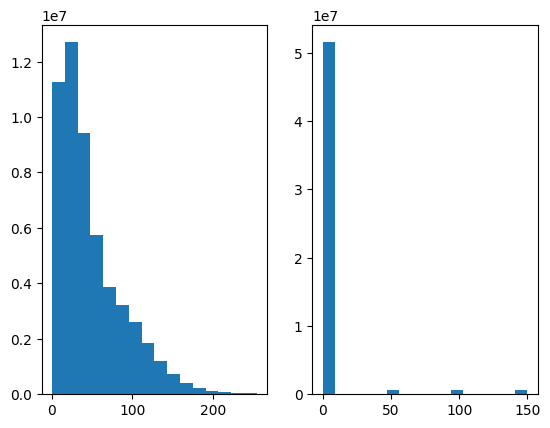

[  0  50 100 150]


In [ ]:
images_values = np.concatenate([image.ravel() for image in images])
masks_values = np.concatenate([mask.ravel() for mask in masks ])

plt.figure()
plt.subplot(1, 2, 1)
plt.hist(images_values, bins=16)
plt.subplot(1, 2, 2)
plt.hist(masks_values, bins=16)
plt.show()
print(np.unique(masks_values))

[232 232 232 ... 216 216 216]
[256 256 256 ... 256 256 256]


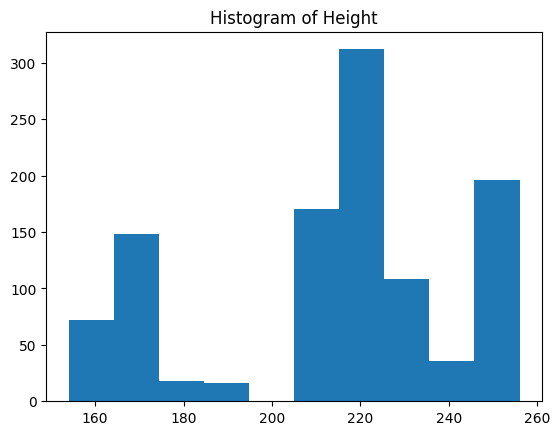

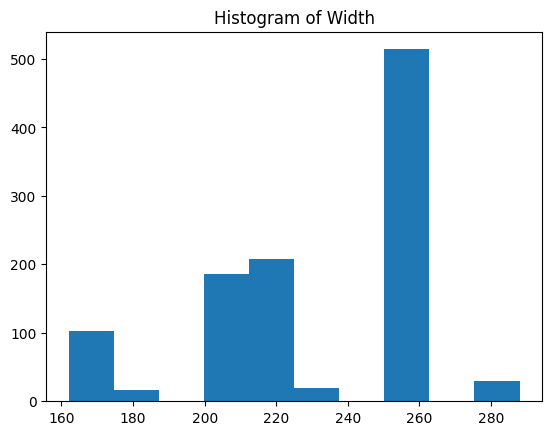

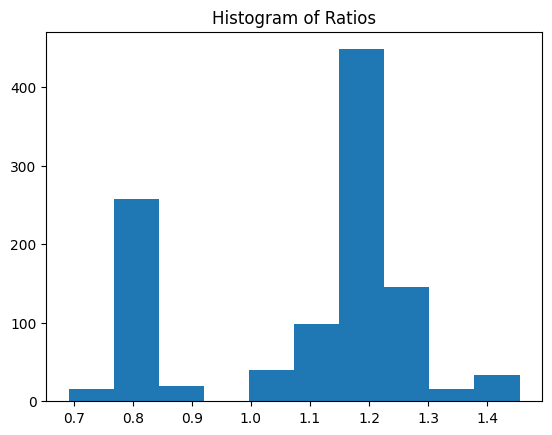

In [ ]:
height_values = np.array([image.shape[0] for image in images])
print(height_values)
width_values = np.array([image.shape[1] for image in images])
print(width_values)

ratios = width_values / height_values

plt.figure()
plt.hist(height_values)
plt.title("Histogram of Height")
plt.show()

plt.figure()
plt.hist(width_values)
plt.title("Histogram of Width")
plt.show()

plt.figure()
plt.hist(ratios)
plt.title("Histogram of Ratios")
plt.show()

In [ ]:
print(np.zeros((5, 2, 3)))

[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]]


In [ ]:
image_shape = (128, 128)
n_val_samples = len(val_images_list)
n_train_samples = len(train_images_list)

In [ ]:
X_val = np.zeros((n_val_samples, image_shape[0], image_shape[1], 1))
Y_val = np.zeros((n_val_samples, image_shape[0], image_shape[1]))

X_train = np.zeros((n_train_samples, image_shape[0], image_shape[1], 1))
Y_train = np.zeros((n_train_samples, image_shape[0], image_shape[1]))

In [ ]:
for i in range(n_val_samples):
  image = Image.open(os.path.join(val_images_path, val_images_list[i]))
  image = image.resize(image_shape, resample = Image.BILINEAR)
  image = np.array(image) / 255
  mask = Image.open(os.path.join(val_masks_path, val_masks_list[i]))
  mask = mask.resize(image_shape, resample = Image.NEAREST)
  mask = np.array(mask) / 50
  X_val[i, :, :, 0] = image
  Y_val[i, :, :] = mask

In [ ]:
for i in range(n_train_samples):
  image = Image.open(os.path.join(train_images_path, train_images_list[i]))
  image = image.resize(image_shape, resample = Image.BILINEAR)
  image = np.array(image) / 255
  mask = Image.open(os.path.join(train_masks_path, train_masks_list[i]))
  mask = mask.resize(image_shape, resample = Image.NEAREST)
  mask = np.array(mask) / 50
  X_train[i, :, :, 0] = image
  Y_train[i, :, :] = mask

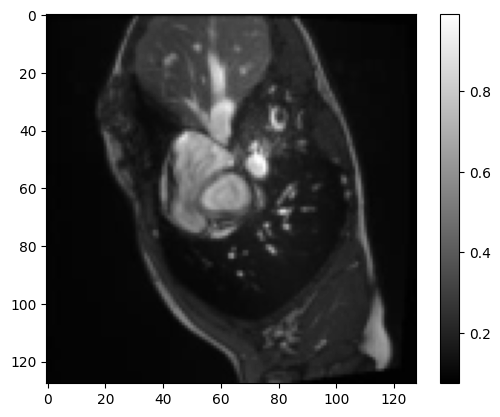

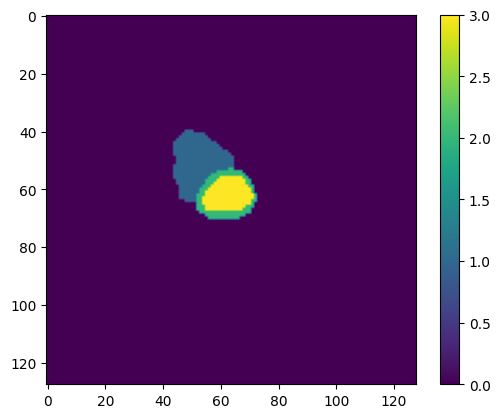

In [ ]:
k = 120
plt.figure()
plt.imshow(X_val[k, :, :, 0], cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(Y_val[k, :, :])
plt.colorbar()
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/X_val.npy', X_val)
np.save('/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/Y_val.npy', Y_val)
np.save('/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Veritas AI/Veritas AI - Micah/data/Y_train.npy', Y_train)